In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Dense 

sns.set_context('notebook', font_scale=1.5)

In [2]:
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    mae = history.history['mae']
    val_mae = history.history['val_mae']
    
    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 7))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = mae, label='Training Mean Absolute Error', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_mae, label='Validation Mean Absolute Error', ax=ax[1])
    ax2.set(title = 'Mean Absolute Error', xlabel = 'Epochs')
    

In [3]:
hour = pd.read_csv('hour.csv')

In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour.shape

(17379, 17)

In [6]:
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [7]:
hour['day'] = hour['dteday'].dt.day

In [8]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [9]:
hour.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

In [10]:
hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [11]:
hour.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day           0
dtype: int64

In [12]:
hour.duplicated().sum()

0

In [13]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
 13  day         17379 non-null  int32  
dtypes: float64(4), int32(1), int64(9)
memory usage: 1.8 MB


### Split

In [14]:
X = hour.drop(columns=['cnt'])
y = hour['cnt']

In [15]:
X_train = X.sample(frac=.8, random_state=0)
y_train = y.sample(frac=.8, random_state=0)
X_test = X.drop(X_train.index)
y_test = y.drop(y_train.index)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13903, 13)
(13903,)
(3476, 13)
(3476,)


### Model with Neural Networks - Linear Regression - Baseline

In [17]:
X_train.shape[1]

13

In [18]:
def build_model():

    inputs = tf.keras.Input(shape=[X_train.shape[1]])

    x = tf.keras.layers.Dense(1, activation=tf.nn.relu)(inputs)

    outputs = tf.keras.layers.Dense(1)(x)
    
    return tf.keras.Model(inputs, outputs)
    


In [19]:
model = build_model()

2023-12-29 21:54:52.546435: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-29 21:54:52.571450: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-29 21:54:52.571671: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=['mse'],
             metrics=['mae'])

In [21]:
history = model.fit(X_train, y_train, epochs=10, validation_split=.2, verbose=1)

Epoch 1/10


2023-12-29 21:54:53.176826: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-29 21:54:53.478974: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe2c0386130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-29 21:54:53.478999: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-12-29 21:54:53.484272: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-29 21:54:53.498112: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1703897693.547786   17180 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


348/348 [==============================] - 2s 3ms/step - loss: 58434.8672 - mae: 167.1224 - val_loss: 55558.5820 - val_mae: 160.3048
Epoch 2/10
348/348 [==============================] - 1s 2ms/step - loss: 46481.4102 - mae: 145.2752 - val_loss: 43590.8828 - val_mae: 141.7841
Epoch 3/10
348/348 [==============================] - 1s 2ms/step - loss: 36638.4297 - mae: 131.3540 - val_loss: 35684.7109 - val_mae: 133.2982
Epoch 4/10
348/348 [==============================] - 1s 2ms/step - loss: 31483.4492 - mae: 127.8447 - val_loss: 32334.9648 - val_mae: 132.9489
Epoch 5/10
348/348 [==============================] - 1s 2ms/step - loss: 29701.3867 - mae: 128.9332 - val_loss: 31231.9199 - val_mae: 133.8475
Epoch 6/10
348/348 [==============================] - 1s 2ms/step - loss: 29084.6484 - mae: 129.7897 - val_loss: 30695.0586 - val_mae: 133.7690
Epoch 7/10
348/348 [==============================] - 1s 2ms/step - loss: 28671.0859 - mae: 129.4608 - val_loss: 30243.5352 - val_mae: 133.3126
Epo

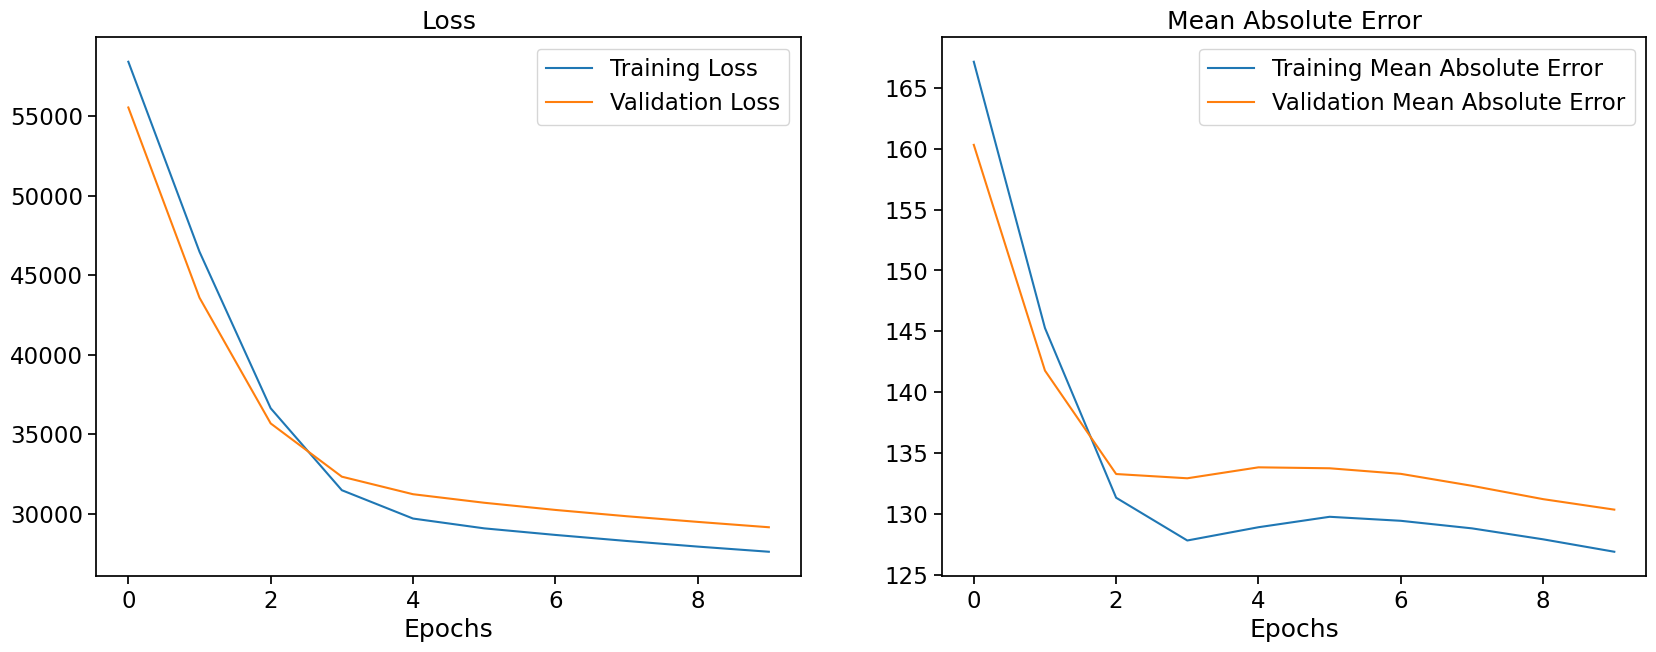

In [22]:
plot_loss_curves(history)

### Model Linear Regression  - Fine Tuning 

In [48]:
X_train = X.sample(frac=.8, random_state=0)
y_train = y.sample(frac=.8, random_state=0)
X_test = X.drop(X_train.index)
y_test = y.drop(y_train.index)

In [49]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()
y_train = (y_train - y_train.mean()) / y_train.std()
y_test = (y_test - y_test.mean()) / y_test.std()

In [50]:
def build_model():
    inputs = keras.Input(shape=[X_train.shape[1]])
    
    x = Dense(2048, activation=tf.nn.relu)(inputs)
    
    x = Dense(2048, activation=tf.nn.relu)(x)
    
    x = Dense(2048, activation=tf.nn.relu)(x)
    
    x = Dense(2048, activation=tf.nn.relu)(x)
    
    outputs = Dense(1, activation=tf.nn.relu)(x)
    
    return keras.Model(inputs, outputs)

In [51]:
model = build_model()

In [52]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=['mse'],
              metrics=['mae'])

In [53]:
history = model.fit(X_train, y_train, epochs=10, validation_split=.2)

Epoch 1/10
348/348 [==============================] - 5s 10ms/step - loss: 0.6820 - mae: 0.6897 - val_loss: 0.6028 - val_mae: 0.6345
Epoch 2/10
348/348 [==============================] - 3s 10ms/step - loss: 0.5401 - mae: 0.6128 - val_loss: 0.5208 - val_mae: 0.6082
Epoch 3/10
348/348 [==============================] - 3s 10ms/step - loss: 0.4824 - mae: 0.5775 - val_loss: 0.5094 - val_mae: 0.5990
Epoch 4/10
348/348 [==============================] - 3s 10ms/step - loss: 0.4393 - mae: 0.5528 - val_loss: 0.4253 - val_mae: 0.5450
Epoch 5/10
348/348 [==============================] - 3s 10ms/step - loss: 0.4118 - mae: 0.5326 - val_loss: 0.4347 - val_mae: 0.5528
Epoch 6/10
348/348 [==============================] - 3s 10ms/step - loss: 0.4030 - mae: 0.5269 - val_loss: 0.4176 - val_mae: 0.5387
Epoch 7/10
348/348 [==============================] - 3s 10ms/step - loss: 0.3965 - mae: 0.5199 - val_loss: 0.4221 - val_mae: 0.5441
Epoch 8/10
348/348 [==============================] - 4s 10ms/step - 

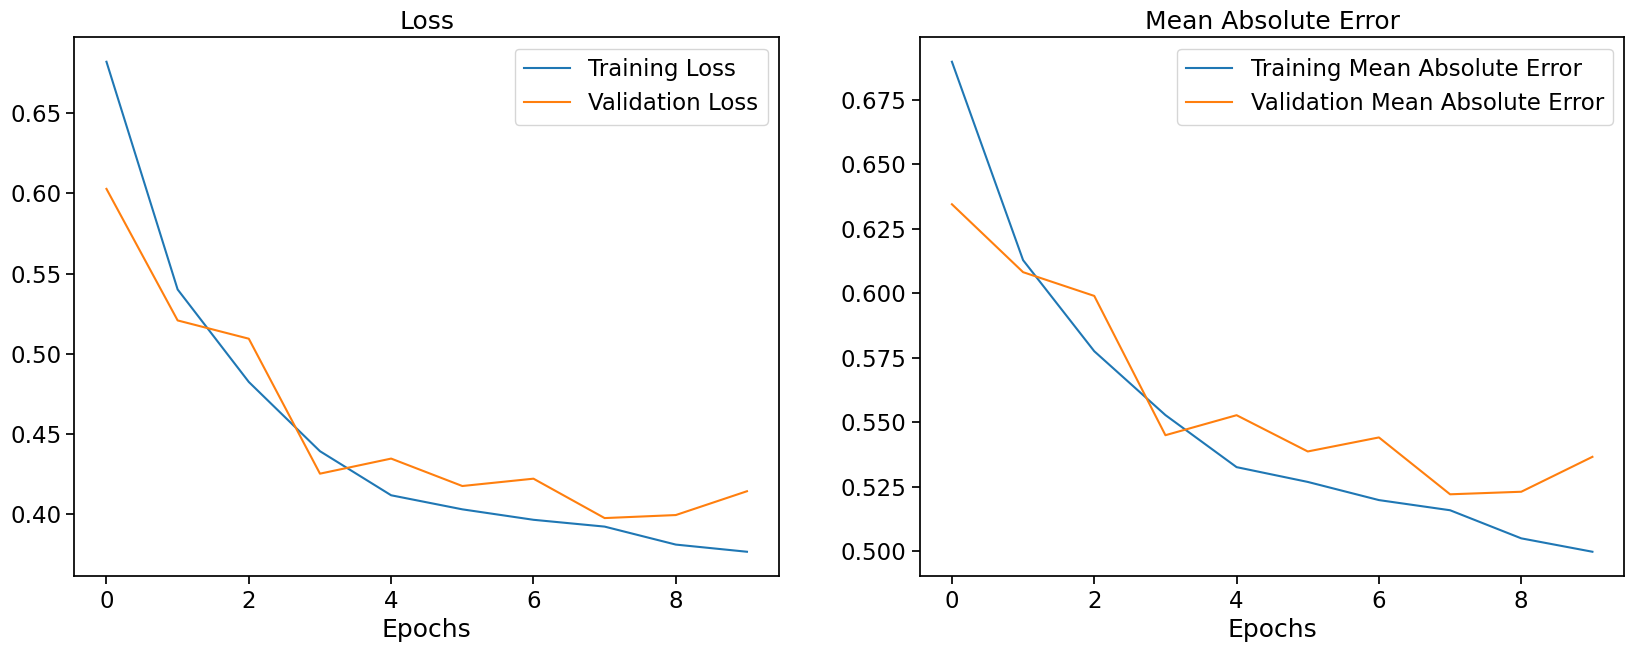

In [55]:
plot_loss_curves(history)

In [56]:
y_pred = model.predict(X_test)

109/109 [==============================] - 0s 1ms/step


In [57]:
model.evaluate(X_test, y_test)

109/109 [==============================] - 0s 2ms/step - loss: 0.4044 - mae: 0.5245


[0.40435224771499634, 0.5245236754417419]